# k-Nearest Neighbor (kNN) assignment

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# Mnist dataset 불러오기

In [82]:
from sklearn.datasets import fetch_openml

# load mnist data
mnist_data = fetch_openml('mnist_784')
X_data = mnist_data.data
Y_data = mnist_data.target.astype('int32')

# shuffling data
shuffle_mask = np.arange(X_data.shape[0])
np.random.shuffle(shuffle_mask)
X_data = X_data[shuffle_mask]
Y_data = Y_data[shuffle_mask]

# divide data : train, test data
X_train = X_data[:10000]
X_test = X_data[10000:11000]
Y_train = Y_data[:10000]
Y_test = Y_data[10000:11000]

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(10000, 784)
(1000, 784)
(10000,)
(1000,)


# Mnist 이미지 출력

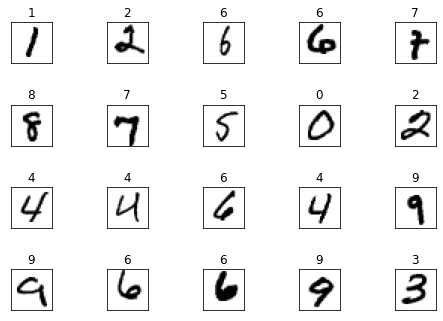

In [83]:
sample_X = X_train[:20]
sample_Y = Y_train[:20]

fig = plt.figure()
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=1, hspace=1)
for i in range(20):
    subplot = fig.add_subplot(4, 5, i+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d'%sample_Y[i])
    subplot.imshow(sample_X[i].reshape(28,28), cmap=plt.cm.gray_r)
plt.show()

# # Problem 1 (10 pts)
Test data(X_test)와 training data(X_train) 사이의 거리를 ***for loop를 두번 사용하여*** distance matrix(dist_mat)에 저장한 후 dist_mat을 return 하는 함수를 작성하시오.
- distance matrix(dist_mat) : numpy array of shape (test data 수, train data 수). (dist_mat[i,j] : i번째 test data와 j번째 train data 사이의 거리)
- 거리는 L2 distance로 구할 것.

In [107]:
def Problem_1(X_test, X_train):
    
    test_num = 10
    train_num = 10
    dist_mat = np.zeros((test_num, train_num))
    for i in range(test_num):
        for j in range(train_num):
            ############# Put your code here ################
            dist_mat[i,j] = np.sqrt(np.sum(np.power(X_train[j]-X_test[i], 2)))
            #################################################
    return dist_mat
print(Problem_1(X_test, X_train))

[[3135.6571879  2664.99943715 3004.22502486 3193.46301059 3132.45782095
  3125.6490526  3160.60389799 3091.56254991 2738.23629368 2666.57870688]
 [2754.92359241 2722.97925075 2477.51044397 2940.79581066 2555.83137159
  2488.16880456 2769.56440618 2400.07854038 2828.79302884 2841.66676442]
 [2579.0151221  2980.01661069 2746.76336804 2975.34855101 2609.67450078
  2265.41629728 2942.11624515 2669.72208291 2961.84351376 3142.57330861]
 [2047.51434671 2744.19988339 2098.38723786 3128.02221859 1887.15420674
  2062.99418322 2735.75254729 1754.82192829 2678.72712309 2803.14698152]
 [1597.99812265 2581.06179701 2288.23206865 3171.82975583 2087.68005212
  2393.57849255 2993.19444741 2399.41888798 3030.67385246 2944.19938184]
 [2784.62959835 3092.82007236 2384.92515606 3102.34524191 2619.20560476
  2433.87961904 2068.91686638 2521.9050339  2868.18444316 2932.04502012]
 [2254.74566193 2586.24940793 2194.39285453 2895.78072374 2142.54708233
  2059.80193223 2534.01992889 2216.97564263 2777.14529688 

# # Problem 2 (20 pts)
Test data(X_test)와 training data(X_train) 사이의 거리를 ***for loop를 사용하지 않고 numpy 연산만을 이용하여*** distance matrix(dist_mat)에 저장한 후 dist_mat을 return 하는 함수를 작성하시오.
- L2 distance로 거리를 구할 것.

In [102]:
def Problem_2(X_test, X_train):
    
    test_num = 10
    train_num = 10
    dist_mat = np.zeros((test_num, train_num))
    ############# Put your code here ################
    dist_mat = np.sqrt(np.power((X_test[:test_num]-X_train[:train_num]), 2)) 
    #################################################        
    return dist_mat

print(Problem_2(X_test, X_train))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# # Problem 3 (10 pts)
time 라이브러리를 이용하여 Problem_1, Problem_2 함수의 실행시간(초)을 측정한 후 비교하고, 두 함수에서 계산된 distance matrix가 같은 matrix임을 보이시오.

In [108]:
import time

dist_mat_two_loop = 0
dist_mat_no_loop = 0
problem1_time = 0
problem2_time = 0

############# Put your code here ################
            
#################################################   


print('Problem1 (two for loop) execution time : %f'%problem1_time)
print('Problem2 (no for loop) execution time : %f'%problem2_time)

difference = np.linalg.norm(dist_mat_two_loop - dist_mat_no_loop, ord='fro')
if difference < 0.001:
    print('The distance matrices are the same')
else:
    print('The distance matrices are different')

Problem1 (two for loop) execution time : 0.000000
Problem2 (no for loop) execution time : 0.000000


ValueError: ignored

# # Problem 4 (10 pts)
KNN 알고리즘으로 test 데이터의 label 값을 예측하여 return 해주는 함수를 만들고, 실제 label 값과 비교하여 예측의 정확도를 구하시오.
- 위에서 구한 distance matrix를 이용.
- k = 3

In [0]:
def Problem_4(dist_mat, k, Y_train):
    
    test_num = None
    Y_predict = np.zeros(test_num)

    for i in range(test_num):
        ############# Put your code here ################
        
        #################################################   
    return Y_predict

y_pred = Problem_4(dist_mat_no_loop, 3, Y_train)
accuracy = None
############# Put your code here ################

#################################################
print('Test data prediction accuracy : %f'%accuracy)

# # Problem 5 (20 pts)
training 데이터를 split 하여, 5 fold cross validation을 수행하고 최적의 hyper parameter K 를 찾으시오. 또한, cross validation 기법을 사용하는 이유를 조사한 후 간단히 서술하시오.
- numpy 외 다른 라이브러리 사용 금지.
- 위에서 정의한 함수들 이용.
- k_candidate list에 hyper parameter k 후보들을 저장. ex) k_candidate = [3, 5, 7, 10, 15]
- accuracy_dict[x]에 k = x 일때 5개의 validation accuracy 저장. ex) print(accuracy_dict[3]) -> [70.01, 68.93, 54.412, 65.643, 68.85]
- https://www.youtube.com/watch?v=OoUX-nOEjG0&list=PLC1qU-LWwrF64f4QKQT-Vg5Wr4qEE1Zxk&index=2 28분30초~39분30초 참고.

Cross validation 사용 이유 : 


In [0]:
num_fold = 5
k_candidate = []
accuracy_dict = {}
X_train_folds = []
Y_train_folds = []
for k in k_candidate:
    accuracy_dict[k] = []

############# Put your code here ################
            
#################################################
for i in range(num_fold):
    ############# Put your code here ################
            
    #################################################
    for k in k_candidate:
        ############# Put your code here ################
            
        #################################################   
        

        
for k in k_candidate:
    accuracies = accuracy_dict[k]
    plt.scatter([k] * len(accuracies), accuracies)
    
accuracies_mean = np.array([np.mean(v) for k,v in sorted(accuracy_dict.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(accuracy_dict.items())])
plt.errorbar(k_candidate, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

# #Problem 6 (10 pts)
Problem5 에서 구한 best hyperparameter k와 Problem4에서 작성한 함수를 이용하여 test 데이터의 label 값을 예측하고, 정확도를 구하시오.

In [0]:
best_k = ##### Your best k ##########

y_pred = Problem_4(dist_mat_no_loop, best_k, Y_train)
accuracy = None
############# Put your code here ################
            
#################################################   
print('Test data prediction accuracy : %f'%accuracy)

# #Problem 7 (20 pts)
Problem5, Problem6의 과정을 Scikit-learn 라이브러리를 이용하여 수행하시오.
- sklearn.neighbors.KNeighborsClassifier, sklearn.model_selection.cross_val_score 함수 사용법을 구글링 해볼 것.

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

k_candidate = []
accuracy_dict = {}
for k in k_candidate:
    accuracy_dict[k] = []

for k in k_candidate:
    ############# Put your code here ################
            
    #################################################   


for k in k_candidate:
    accuracies = accuracy_dict[k]
    plt.scatter([k] * len(accuracies), accuracies)
    
accuracies_mean = np.array([np.mean(v) for k,v in sorted(accuracy_dict.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(accuracy_dict.items())])
plt.errorbar(k_candidate, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

In [0]:
best_k = ##### Your best k ##########

y_pred = None
accuracy = None
############# Put your code here ################
           
#################################################   
print('Test data prediction accuracy : %f'%accuracy)